In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

tf.__version__, keras.__version__

('2.8.0', '2.8.0')

In [ ]:
%run ../utils/pipelines.ipynb

In [ ]:
from sklearn.metrics import f1_score
import keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def mlp_model(X):
    model = keras.models.Sequential([
        keras.Input(shape=(X.shape[1],)),
        keras.layers.Dense(100, activation='relu'),
        # keras.layers.Dense(200, activation='relu'),
        # keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ],  )

    sgd = keras.optimizers.SGD(learning_rate=.01)
    binarycrossentropy = keras.losses.BinaryCrossentropy()
    model.compile(loss=binarycrossentropy, 
        optimizer=sgd, 
        metrics=['accuracy', f1_m])
    print(model.summary())
    return model


def plot_mlp(history):
    print(history)
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    plt.plot(accuracy, label='accuracy')
    plt.plot(val_accuracy, label='val_accuracy')
    plt.legend()
    sns.despine()
    print('accuracy', np.mean(accuracy))
    print('val_accuracy', np.mean(val_accuracy))
    print('f1_score_macro', np.mean(history.history['f1_m']), 'val_f1_m', np.mean(history.history['val_f1_m']))



### 0: lose &amp; tie, 1:win

In [ ]:
X2, y2 = data_loseandtie()
# mlp_with_data(X2, y2)
y2[y2==0].size, y2[y2==1].size

(3130, 7907)

In [ ]:
X, y = data_tieandwin()

from sklearn.pipeline import Pipeline

trainX, testX, trainY, testY = train_test_split(X, y)
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])
pipe.fit(trainX)
trainX = pipe.transform(trainX)
testX = pipe.transform(testX)

### 0:lose, 1: tie &amp; win

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 100)               2300      
                                                                 
 dense_74 (Dense)            (None, 10)                1010      
                                                                 
 dense_75 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,321
Trainable params: 3,321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
207/207 [==============================] - 1s 3ms/step - loss: 0.6333 - accuracy: 0.6528 - f1_m: 0.7548 - val_loss: 0.5856 - val_accuracy: 0.7095 - val_f1_m: 0.8257
Epoch 2/100
207/207 [==============================] - 0s 2ms/step - loss: 0.5715 - accuracy: 0.7180 - f1_m: 0.8301 - val_loss: 0.570

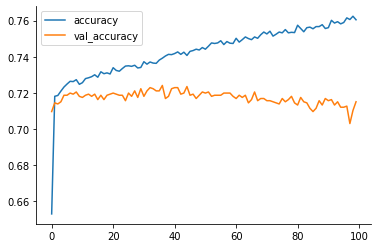

In [ ]:
import time
from keras import models 
# model = models.load_model(model_path, custom_objects= {'f1_score': f1_score})

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
    
start = time.time()
model = mlp_model(X)
history = model.fit(trainX, trainY, epochs=100, validation_split=.2)

end = time.time()
print('time count: ', end - start, 's')
plot_mlp(history)

In [ ]:
y.size
y[y==0].size, y[y==1].size

(3130, 7907)

### PCA

In [ ]:
%run ../utils/pipelines.ipynb

In [ ]:
def plot_corr(X):
    plt.title('correlation heatmap')
    sns.heatmap(pd.DataFrame(X).corr(method='pearson'))

def apply_pca(X):
    pca = PCA()
    pca.fit(X)
    eig_vec = pca.components_
    eig_val = pca.explained_variance_
    return pca, eig_vec, eig_val

def plot_scree(eig_val):
    scree_plot_x = np.arange(0,eig_val.shape[0],1)
    plt.plot(scree_plot_x,eig_val, 'b-')
    plt.plot(scree_plot_x,eig_val, 'r.')
    # plt.xlim(0,22)
    # plt.ylim(0,1e2)
    plt.xlabel('Component Number')
    plt.ylabel('EigenValue')
    plt.title('Scree Plot')
    sns.despine()
    trace = sum(eig_val)
    sum(eig_val[:3])/trace

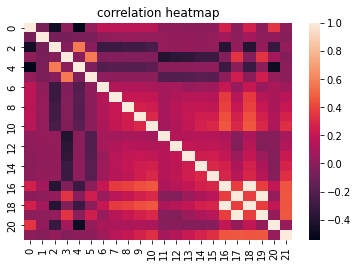

In [ ]:
plot_corr(X)

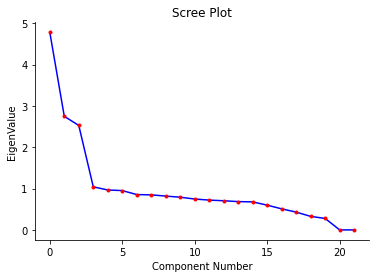

In [ ]:
# trainX2, testX2, trainY2, testY2 = train_test_split(X, y)

pca, eig_vec, eig_val = apply_pca(trainX)

plot_scree(eig_val)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 100)               400       
                                                                 
 dense_71 (Dense)            (None, 10)                1010      
                                                                 
 dense_72 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
207/207 [==============================] - 1s 3ms/step - loss: 0.5759 - accuracy: 0.7144 - f1_m: 0.8312 - val_loss: 0.5775 - val_accuracy: 0.7041 - val_f1_m: 0.8241
Epoch 2/100
207/207 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.7151 - f1_m: 0.8316 - val_loss: 0.573

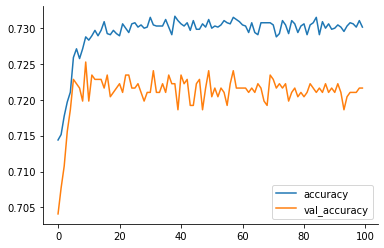

In [ ]:
pca.fit(trainX)
pca_trainX = pca.transform(trainX)
pca_testX = pca.transform(testX)
pca_trainX_first3 = pca_trainX[:, :3]
pca_testX_first3 = pca_testX[:, :3]
model2 = mlp_model(pca_trainX_first3)

start = time.time()
history2 = model2.fit(pca_trainX_first3, trainY, epochs=100, validation_split=.2)
end = time.time()
print('time count: ', end - start, 's')
plot_mlp(history2)

In [ ]:
result = model2.predict(pca_testX_first3)

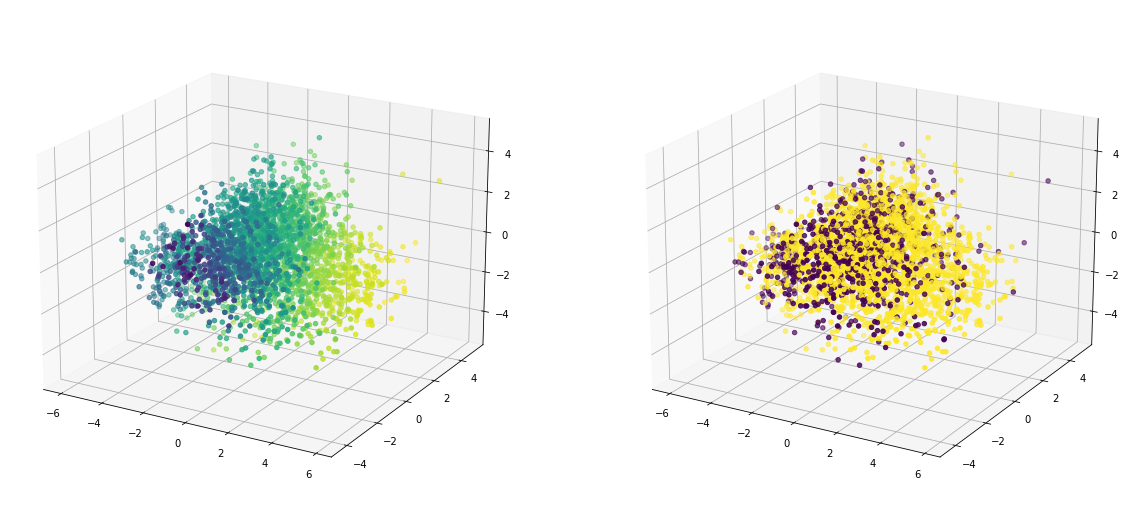

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(1, 2, 1 , projection='3d')
ax1.scatter(pca_testX_first3[:,0], pca_testX_first3[:,1], pca_testX_first3[:,2], c=result)
ax1.view_init(20, 300)


ax1 = fig.add_subplot(1, 2, 2 , projection='3d')
ax1.scatter(pca_testX_first3[:,0], pca_testX_first3[:,1], pca_testX_first3[:,2], c=testY)
ax1.view_init(20, 300)